In [2]:
import sempy.fabric as fabric

df_datasets = fabric.list_datasets()
df_datasets

,Dataset Name,Dataset ID,Created Timestamp,Last Update
0,MS1,201d6ced-aed5-4341-9a8c-53bcb2f38ba3,2021-02-12 23:00:58,NaT


In [3]:
df_tables = fabric.list_tables("MS1", include_columns=False)
df_tables

,Name,Description,Hidden,Data Category,Type
0,Productos,,False,,Table
1,Territorios,,False,,Table
2,calendario,,False,,Table
3,ordenes,,False,,Table


In [4]:
df_columns = fabric.list_tables("MS1", include_columns=True)
df_columns

,Name,Description,Hidden,Data Category,Type,Column
0,Productos,,False,,Table,ProductID
0,Productos,,False,,Table,Name
0,Productos,,False,,Table,Color
0,Productos,,False,,Table,ListPrice
0,Productos,,False,,Table,Subcategory
0,Productos,,False,,Table,Category
1,Territorios,,False,,Table,TerritoryID
1,Territorios,,False,,Table,Región
1,Territorios,,False,,Table,Grupo
2,calendario,,False,,Table,Fecha


In [5]:
df_table = fabric.read_table("MS1", "Territorios")
df_table

,TerritoryID,Región,Grupo
0,1,Northwest,North America
1,2,Northeast,North America
2,3,Central,North America
3,4,Southwest,North America
4,5,Southeast,North America
5,6,Canada,North America
6,7,France,Europe
7,8,Germany,Europe
8,9,Australia,Pacific
9,10,United Kingdom,Europe


In [6]:
relationships = fabric.list_relationships("MS1")
relationships

,Multiplicity,From Table,From Column,To Table,To Column,Active,Cross Filtering Behavior,Security Filtering Behavior,Join On Date Behavior,Rely On Referential Integrity,State,Modified Time,Relationship Name
0,m:1,ordenes,OrderDate,calendario,Fecha,True,OneDirection,OneDirection,DateAndTime,False,Ready,2025-09-23 10:14:25,4bfef397-79a1-043e-fe3b-838a8e86c8a1
1,m:1,ordenes,ProductID,Productos,ProductID,True,OneDirection,OneDirection,DateAndTime,False,Ready,2025-09-23 10:14:39,f22e4cbc-a1b0-ac6d-342b-d94c52b373d7
2,m:1,ordenes,TerritoryID,Territorios,TerritoryID,True,OneDirection,OneDirection,DateAndTime,False,Ready,2025-09-23 10:14:47,8e67f2bb-4f73-63fa-b4c0-5292ab1992f7


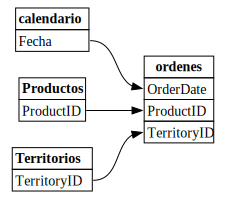

In [7]:
from sempy.relationships import plot_relationship_metadata

relationships = fabric.list_relationships("MS1")
plot_relationship_metadata(relationships)

In [8]:
df_measures = fabric.list_measures("MS1")
df_measures

,Table Name,Measure Name,Measure Expression,Measure Data Type,Measure Hidden,Measure Display Folder,Measure Description,Format String,Data Category,Detail Rows Definition,Format String Definition
0,ordenes,Total Price,"SUMX(ordenes,ordenes[UnitPrice] * ordenes[Orde...",Double,False,,,"#,0.00\ ""€"";-#,0.00\ ""€"";#,0.00\ ""€""",,None,None


In [9]:
fabric.evaluate_measure("MS1", measure="Total Price")

,Total Price
0,110373889.313399


In [10]:
fabric.evaluate_measure(
    "MS1", 
    measure="Total Price", 
    groupby_columns=["Productos[Category]","Territorios[Región]"]
)

,Category,Región,Total Price
0,Accessories,Australia,162664.5486
1,Accessories,Canada,222680.3929
2,Accessories,Central,46783.671
3,Accessories,France,112348.3443
4,Accessories,Germany,97914.0452
5,Accessories,Northeast,51627.3081
6,Accessories,Northwest,163459.2547
7,Accessories,Southeast,46268.0777
8,Accessories,Southwest,255205.0082
9,Accessories,United Kingdom,119810.2618


In [11]:
fabric.evaluate_measure(
    "MS1",
    measure="Total Price",
    groupby_columns=["Productos[Category]","Territorios[Región]"],
    filters={"Territorios[Región]": ["France", "Germany"], "Productos[Category]": ["Bikes"]}
)

,Category,Región,Total Price
0,Bikes,France,6151455.1085
1,Bikes,Germany,4411001.511


In [12]:
%load_ext sempy

In [13]:
%%dax "MS1"
EVALUATE
SUMMARIZECOLUMNS(
    'Productos'[Category],
    'Territorios'[Región],
    "Precio Total", [Total Price]
)

,Productos[Category],Territorios[Región],[Precio Total]
0,Bikes,Northwest,13965980.338
1,Components,Northwest,1784207.4353
2,Clothing,Northwest,259282.4624
3,Accessories,Northwest,163459.2547
4,Bikes,Australia,10203922.8417
5,Components,Australia,203791.0536
6,Clothing,Australia,113491.5624
7,Accessories,Australia,162664.5486
8,Bikes,France,6151455.1085
9,Components,France,871125.1938


In [14]:
from sempy.fabric import FabricDataFrame

df = FabricDataFrame({
        "Productos[Category]": ["Bikes", "Bikes", "Clothing", "Clothing","Shoes", "Shoes"],
        "Territorios[Región]": ["France", "Germany","France", "Germany","France", "Germany"]
    }
)

joined_df = df.add_measure("Total Price", dataset="MS1")
joined_df

,Productos[Category],Territorios[Región],Total Price
0,Bikes,France,6151455.1085
1,Bikes,Germany,4411001.511
2,Clothing,France,156543.2748
3,Clothing,Germany,99157.9945
4,Shoes,France,<NA>
5,Shoes,Germany,<NA>


In [4]:
df_table = fabric.read_table("MS1", "Productos")
df_table

,ProductID,Name,Color,ListPrice,Subcategory,Category
0,1,Adjustable Race,<NA>,0.0,<NA>,<NA>
1,2,Bearing Ball,<NA>,0.0,<NA>,<NA>
2,3,BB Ball Bearing,<NA>,0.0,<NA>,<NA>
3,4,Headset Ball Bearings,<NA>,0.0,<NA>,<NA>
4,316,Blade,<NA>,0.0,<NA>,<NA>
...,...,...,...,...,...,...
499,995,ML Bottom Bracket,<NA>,101.24,Bottom Brackets,Components
500,996,HL Bottom Bracket,<NA>,121.49,Bottom Brackets,Components
501,997,"Road-750 Black, 44",Black,539.99,Road Bikes,Bikes
502,998,"Road-750 Black, 48",Black,539.99,Road Bikes,Bikes


In [9]:
df_table = fabric.read_table("MS1", "Territorios")
df_table

,TerritoryID,Región,Grupo
0,1,Northwest,North America
1,2,Northeast,North America
2,3,Central,North America
3,4,Southwest,North America
4,5,Southeast,North America
5,6,Canada,North America
6,7,France,Europe
7,8,Germany,Europe
8,9,Australia,Pacific
9,10,United Kingdom,Europe
